### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import dataset


In [4]:
diabetes = pd.read_csv('diabetic_data.csv')
diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


### Data exploration and Cleaning


Cleaning tasks such as dropping bad data, dealing with missing values.



In [5]:
diabetes.shape

(101766, 50)

In [6]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

There are 50 features in this data. It conatins numerical values(int) and categorical values(object).

There are 101766 samples present in this dataset. There seem to be no null values.We will dig deep and find out more.

In [7]:
diabetes.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


encounter_id : unique identifier of an encounter


In [8]:
diabetes['encounter_id'].nunique()

101766

All the patients that have come to the hospital have been provided with an encounter_id so that is why there are 101766 different unique values.



patient_nbr : unique identifier of a patient

In [9]:
diabetes['patient_nbr'].nunique()

71518

There are 71518 unique paitents that have entered the system.

encounter_id and patient_nbr: these are just identifiers and not useful variables so they can be dropped from our future analysis

In [10]:
diabetes.drop(['encounter_id','patient_nbr'],axis=1,inplace=True)

race : It is a categorical variable.

In [11]:
diabetes['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

There are 5 distinct categories under race feature. There are some unknown values here entered in the form of '?' which needs to be replaced with nan values so that later these values can be filled.



In [12]:
diabetes['race'] = diabetes['race'].replace('?',np.nan)

gender: It is a categorical feature depicting the gender of the patient.

In [13]:
diabetes.gender.value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

There are 2 categories here: female, male. There is a 3rd category of unknown/invalid which are missing/unknown values ,as there count is less so they can be dropped.

In [14]:
diabetes['gender'] = diabetes['gender'].replace('Unknown/Invalid',np.nan)
diabetes['gender'].dropna(inplace=True)

In [15]:
diabetes.gender.value_counts()

Female    54708
Male      47055
Name: gender, dtype: int64

Age: It is a categorical feature as the age is grouped here in bins of 10 yrs


In [16]:
diabetes.age.value_counts()

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

The age here range from 0 to 100 yrs.

The population falling in the range of 50 to 90 yrs are mostly present in this dataset.

Weight : weight in pounds.


In [17]:
diabetes.weight.value_counts()

?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

Weight is also divided into bins of 25 pounds, but a significant part of the weight has '?' values. So it a good idea to drop this column.



In [18]:
diabetes.drop(['weight'],axis=1,inplace=True)

admission_type_id : Integer identifier corresponding to 8 distinct values, for example, emergency, urgent, elective, newborn, and not available


In [19]:
diabetes.admission_type_id.nunique()

8

There are 8 unique values ranging from 1 to 8.



In [20]:
diabetes.admission_type_id.value_counts()

1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: admission_type_id, dtype: int64

In [21]:
diabetes['admission_type_id']=diabetes['admission_type_id'].replace({1:'Emergency',2:'Emergency',7:'Emergency',
                                 5:'Not Available', 6:'Not Available', 8:'Not Available',
                                 3:'Elective',4:'Newborn'})

In [22]:
diabetes.admission_type_id.value_counts()

Emergency        72491
Elective         18869
Not Available    10396
Newborn             10
Name: admission_type_id, dtype: int64

Droppping the category new born because the admission_type_id == newborn and the age corresponding to it give contradictory information.



In [23]:
diabetes=diabetes[diabetes['admission_type_id']!='Newborn']

In [24]:
diabetes.admission_type_id.value_counts()

Emergency        72491
Elective         18869
Not Available    10396
Name: admission_type_id, dtype: int64

Discharge disposition: Integer identifier corresponding to 26 distinct values, for example, discharged to home, expired, and not available


In [25]:
diabetes.discharge_disposition_id.value_counts()

1     60228
3     13954
6     12898
18     3691
2      2128
22     1993
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: int64

discharge_disposition_id description
1 Discharged to home

2 Discharged/transferred to another short term hospital

3 Discharged/transferred to SNF(skilled nursing facility)

4 Discharged/transferred to ICF(intermediate care facility)

5 Discharged/transferred to another type of inpatient care institution

6 Discharged/transferred to home with home health service

7 Left AMA(Against Medical Advice.)

8 Discharged/transferred to home under care of Home IV provider

9 Admitted as an inpatient to this hospital

10 Neonate discharged to another hospital for neonatal aftercare

11 Expired

12 Still patient or expected to return for outpatient services

13 Hospice / home

14 Hospice / medical facility

15 Discharged/transferred within this institution to Medicare approved swing bed

16 Discharged/transferred/referred another institution for outpatient services

17 Discharged/transferred/referred to this institution for outpatient services

18 NULL

19 Expired at home. Medicaid only, hospice.

20 Expired in a medical facility. Medicaid only, hospice.

21 Expired, place unknown. Medicaid only, hospice.

22 Discharged/transferred to another rehab fac including rehab units of a hospital .

23 Discharged/transferred to a long term care hospital.

24 Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.

25 Not Mapped

26 Unknown/Invalid

30 Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere

27 Discharged/transferred to a federal health care facility.

28 Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital

29 Discharged/transferred to a Critical Access Hospital (CAH).

We can merge several grps over here to reduce the number of categories:
1 ---> Discharged to home

2/3/4/5/10/16/22/23/24/30/27/28/29 ---> Transferred to another medical facility

7 ---> Left AMA(Against Medical Advice.)

6/8 ---> Discharged to home with home health service

9/12/15/17 ---> Still patient/referred to this institution

11/19/20/21 ---> Expired

18/25/26 ---> Not Available

13/14 ---> Hospice

In [26]:
diabetes['discharge_disposition_id']=diabetes['discharge_disposition_id'].replace({1:'Discharged to home',
                                        2:'Transferred to another medical facility',
                                        3:'Transferred to another medical facility',
                                        4:'Transferred to another medical facility',
                                        5:'Transferred to another medical facility',
                                        16:'Transferred to another medical facility',
                                        22:'Transferred to another medical facility',
                                        23:'Transferred to another medical facility',
                                        24:'Transferred to another medical facility',
                                        27:'Transferred to another medical facility',
                                        28:'Transferred to another medical facility',
                                        29:'Transferred to another medical facility',
                                        30:'Transferred to another medical facility',                            
                                        6:'Discharged to home with home health service',
                                        8:'Discharged to home with home health service',
                                        7:'Left AMA',
                                        9:'Still patient/referred to this institution',
                                        12:'Still patient/referred to this institution',
                                        15:'Still patient/referred to this institution',
                                        17:'Still patient/referred to this institution',
                                        10:'Neonate discharged',
                                        11:'Expired',
                                        19:'Expired',
                                        20:'Expired',
                                        21:'Expired',
                                        13:'Hospice',
                                        14:'Hospice',
                                        18:'Not Available',
                                        25:'Not Available',
                                        26:'Not Available'                                 
})

In [27]:
diabetes.discharge_disposition_id.value_counts()

Discharged to home                             60228
Transferred to another medical facility        20689
Discharged to home with home health service    13006
Not Available                                   4680
Expired                                         1652
Hospice                                          771
Left AMA                                         623
Still patient/referred to this institution       101
Neonate discharged                                 6
Name: discharge_disposition_id, dtype: int64

The patients who have expired should be removed from the system beacuse they will create bias as they will not be readmitted.



In [28]:
diabetes=diabetes[diabetes['discharge_disposition_id']!='Expired']
diabetes=diabetes[diabetes['discharge_disposition_id']!='Neonate discharged']
diabetes=diabetes[diabetes['discharge_disposition_id']!='Hospice']

In [29]:
diabetes.discharge_disposition_id.value_counts()

Discharged to home                             60228
Transferred to another medical facility        20689
Discharged to home with home health service    13006
Not Available                                   4680
Left AMA                                         623
Still patient/referred to this institution       101
Name: discharge_disposition_id, dtype: int64

admission_source_id: Integer identifier corresponding to 17 distinct values, for example, physician referral, emergency room, and transfer from a hospital


In [30]:
diabetes.admission_source_id.value_counts(sort=False)

1     29163
2      1081
3       185
4      3113
5       806
6      2239
7     55845
8        15
9       125
10        8
11        2
13        1
14        1
17     6570
20      159
22       12
25        2
Name: admission_source_id, dtype: int64

1 Physician Referral

2 Clinic Referral

3 HMO Referral(Health Maintenance Organization)

4 Transfer from a hospital

5 Transfer from a Skilled Nursing Facility (SNF)

6 Transfer from another health care facility

7 Emergency Room

8 Court/Law Enforcement

9 Not Available

10 Transfer from critial access hospital

11 Normal Delivery

12 Premature Delivery

13 Sick Baby

14 Extramural Birth

15 Not Available

17 NULL

18 Transfer From Another Home Health Agency

19 Readmission to Same Home Health Agency

20 Not Mapped

21 Unknown/Invalid

22 Transfer from hospital inpt/same fac reslt in a sep claim

23 Born inside this hospital

24 Born outside this hospital

25 Transfer from Ambulatory Surgery Center

26 Transfer from Hospice

We can merge several grps over here to reduce the number of categories:
1/2/3 ---> Referral

4/5/6/10/18/19/25/26/22 ---> Transferred from another health care facility

7 ---> Emergency

9/15/17/20/21 ---> Not Available

8 ---> Court/Law Enforcement

Delivery ---> 11/12/14/13/23/24

In [31]:
diabetes['admission_source_id']=diabetes['admission_source_id'].replace({1:'Referral',
                                   2:'Referral',
                                   3:'Referral',
                                   4:'Transferred from another health care facility',
                                   5:'Transferred from another health care facility',
                                   6:'Transferred from another health care facility',
                                   8:'Emergency',                                    
                                   10:'Transferred from another health care facility',
                                   18:'Transferred from another health care facility',
                                   19:'Transferred from another health care facility',
                                   25:'Transferred from another health care facility',
                                   26:'Transferred from another health care facility',
                                   7:'Emergency',
                                   9:'Not Available',
                                   15:'Not Available',
                                   17:'Not Available',
                                   20:'Not Available',
                                   21:'Not Available',
                                   11:'Delivery',
                                   12:'Delivery',
                                   13:'Delivery',
                                   14:'Delivery',
                                   23:'Delivery',
                                   22:"Transferred from another health care facility",                                    
                                   24:'Delivery'                                              
})

In [32]:
diabetes.admission_source_id.value_counts()

Emergency                                        55860
Referral                                         30429
Not Available                                     6854
Transferred from another health care facility     6180
Delivery                                             4
Name: admission_source_id, dtype: int64

In [33]:
diabetes=diabetes[diabetes['admission_source_id']!='Delivery']

In [34]:
diabetes.admission_source_id.value_counts()

Emergency                                        55860
Referral                                         30429
Not Available                                     6854
Transferred from another health care facility     6180
Name: admission_source_id, dtype: int64

Time in hospital: Integer number of days between admission and discharge


In [35]:
diabetes.time_in_hospital.value_counts(sort=False)

1     13824
2     16886
3     17425
4     13682
5      9747
6      7354
7      5696
8      4269
9      2878
10     2262
11     1770
12     1383
13     1152
14      995
Name: time_in_hospital, dtype: int64

The time in the hospital ranges from 1 day to 14 days.



payer_code : Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay Medical

In [36]:
diabetes.payer_code.value_counts(sort=False)

DM      545
WC      135
OG     1011
PO      585
MD     3472
MC    31332
UN     2410
?     39387
CP     2464
SI       55
SP     4941
OT       92
CM     1876
CH      142
MP       79
FR        1
HM     6195
BC     4601
Name: payer_code, dtype: int64

Payer code has a significant number of null values ('?') and it are not signification w.r.t the patient readmission so we can drop it.

In [37]:
diabetes.drop(['payer_code'],axis=1,inplace=True)

12.medical_specialty: Integer identifier of a specialty of the admitting physician, corresponding to 73 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon

In [38]:
diabetes.medical_specialty.nunique()

73

In [39]:
diabetes['medical_specialty'] = diabetes['medical_specialty'].replace('?',np.nan)

num_lab_procedures: Number of lab tests performed during the encounter


In [40]:
print('The number of lab tests a patient has undergone can range from',diabetes.num_lab_procedures.min(),'to',diabetes.num_lab_procedures.max())

The number of lab tests a patient has undergone can range from 1 to 132


num_procedures: Number of procedures(other than lab tests) performed during the encounter

In [41]:
diabetes.num_procedures.value_counts()

0    45672
1    20247
2    12367
3     9202
6     4799
4     4048
5     2988
Name: num_procedures, dtype: int64

No of procedures range from 0 to 5



num_medications: Number of distinct generic names administered during the encounter


In [42]:
print('The number of medications range from a minimum of',diabetes.num_medications.min(),'to maximum of',diabetes.num_medications.max())

The number of medications range from a minimum of 1 to maximum of 81


number_outpatient: Number of outpatient visits of the patient in the year preceding the encounter

number_emergency : Number of emergency visits of the patient in the year preceding the encounter

number_inpatient: Number of inpatient visits of the patient in the year preceding the encounter

The above three measures depict the utilization of hospital/clinic services of the current patient in the past years, so we combined these features into a new variable called preceding_year_visits.

In [43]:
diabetes['preceding_year_visits'] = diabetes['number_outpatient'] + diabetes['number_emergency'] + diabetes['number_inpatient']

In [44]:
diabetes.drop(['number_outpatient','number_emergency','number_inpatient'],axis=1,inplace=True)

We noticed that for two variables (drugs named citoglipton and examide), all records have the same value. So essentially these cannot provide any interpretive for predicting readmission, so we dropped these columns.

In [45]:
diabetes.drop(['citoglipton', 'examide'], axis = 1,inplace=True)

The outcome we are looking at is whether the patient gets readmitted to the hospital within 30 days or not.



In [46]:
diabetes.readmitted.value_counts()

NO     52514
>30    35496
<30    11313
Name: readmitted, dtype: int64

The outcome actually has < 30, > 30 and No Readmission categories.So wrt our problem we will convert this into 2 categories i.e No readmission or readmission with in 30 days



In [47]:
diabetes['readmitted'] = diabetes['readmitted'].replace('>30', 'NO')
diabetes.readmitted.value_counts()

NO     88010
<30    11313
Name: readmitted, dtype: int64

In [48]:
diabetes.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,preceding_year_visits
0,Caucasian,Female,[0-10),Not Available,Not Available,Referral,1,Pediatrics-Endocrinology,41,0,...,No,No,No,No,No,No,No,No,NO,0
1,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency,3,NaN,59,0,...,Up,No,No,No,No,No,Ch,Yes,NO,0
2,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,Emergency,2,NaN,11,5,...,No,No,No,No,No,No,No,Yes,NO,3
3,Caucasian,Male,[30-40),Emergency,Discharged to home,Emergency,2,NaN,44,1,...,Up,No,No,No,No,No,Ch,Yes,NO,0
4,Caucasian,Male,[40-50),Emergency,Discharged to home,Emergency,1,NaN,51,0,...,Steady,No,No,No,No,No,Ch,Yes,NO,0


In [49]:
diabetes.shape

(99323, 42)

In [50]:
diabetes.to_csv('Diabetes_Clean1.csv', index = False)

# EDA

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, PowerTransformer, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
import scipy.stats as stats
from sklearn.feature_selection import mutual_info_classif
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Spearman Corrleation


In [59]:
df = pd.read_csv("Diabetes_Clean1.csv")
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,preceding_year_visits
0,Caucasian,Female,[0-10),Not Available,Not Available,Referral,1,Pediatrics-Endocrinology,41,0,1,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,0
1,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency,3,NaN,59,0,18,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,0
2,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,Emergency,2,NaN,11,5,13,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,3
3,Caucasian,Male,[30-40),Emergency,Discharged to home,Emergency,2,NaN,44,1,16,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,0
4,Caucasian,Male,[40-50),Emergency,Discharged to home,Emergency,1,NaN,51,0,8,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,0


In [60]:
df1 = df.copy()
obj = df1.select_dtypes('O').columns
le = LabelEncoder()
for i in obj:
    df1[i] = le.fit_transform(df1[i])

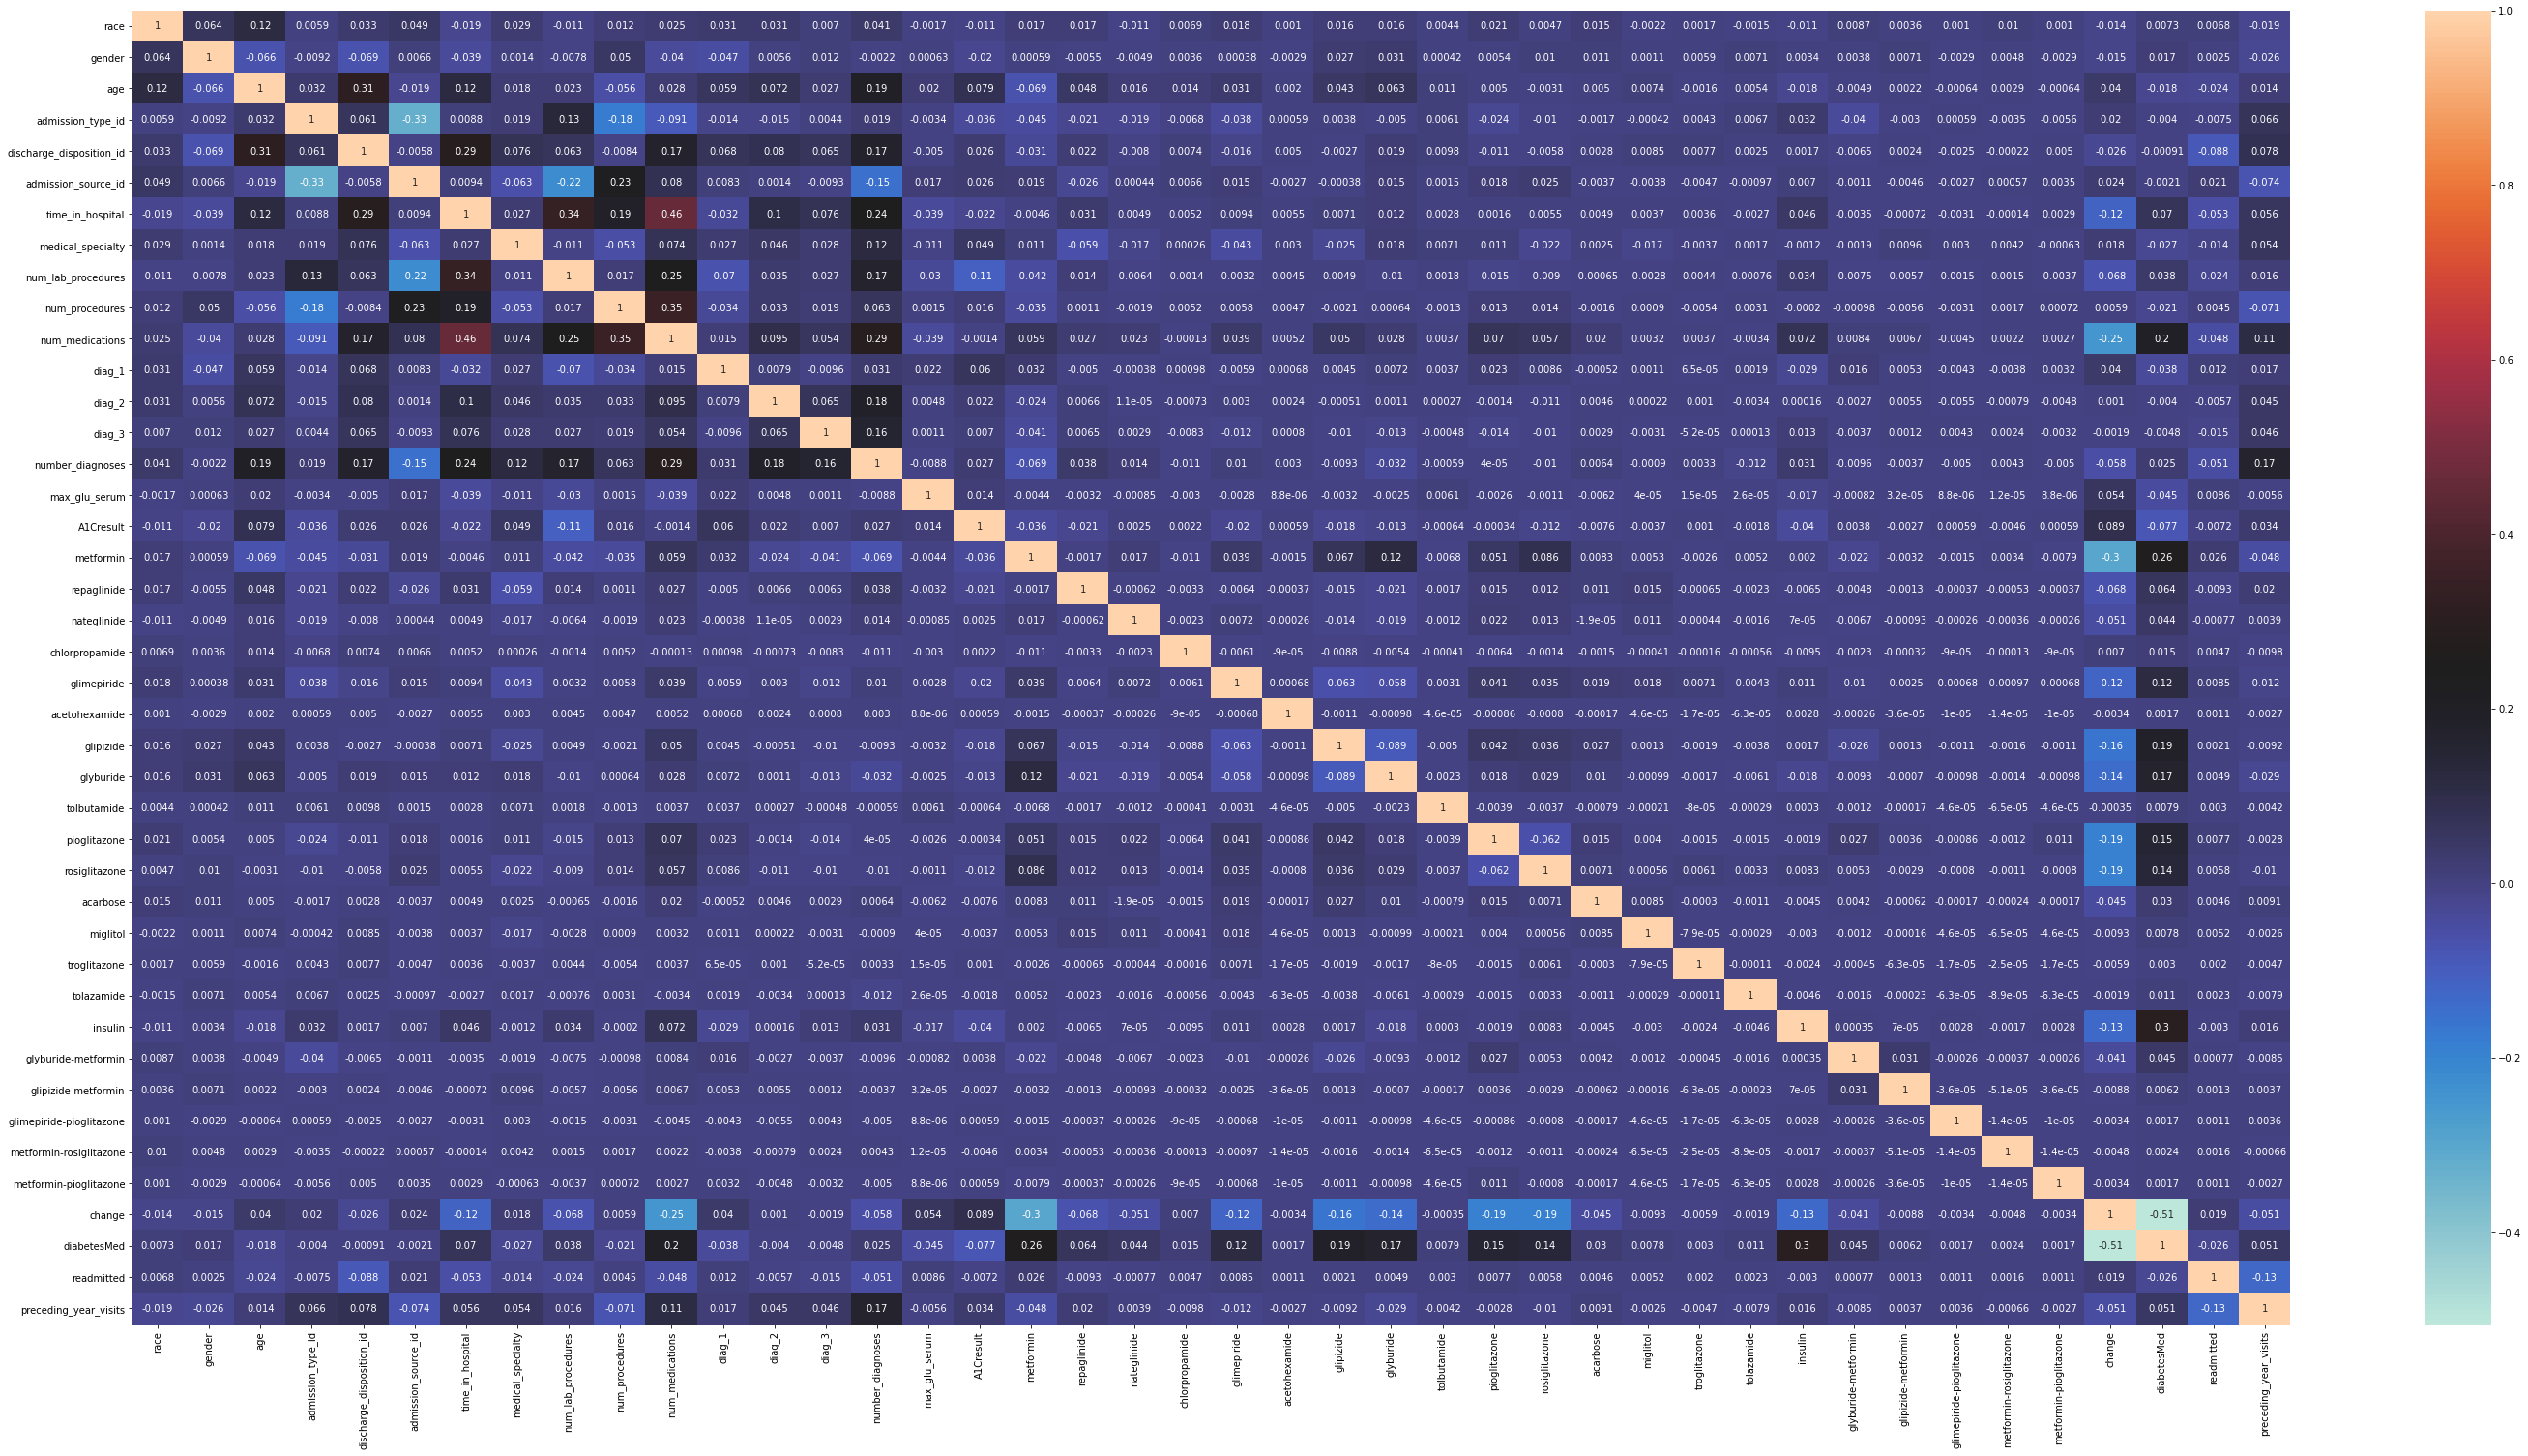

In [61]:
plt.figure(figsize = (50, 25))
sns.heatmap(df1.corr(method = 'spearman'), annot = True, cmap = 'icefire')
plt.show()

In [384]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [385]:
# Load the train and test datasets to create two DataFrames
train_url = "Diabetes_Clean1.csv"
train = pd.read_csv(train_url)

In [386]:
print("***** Train_Set *****")
print(train.head())

***** Train_Set *****
              race  gender      age admission_type_id  \
0        Caucasian  Female   [0-10)     Not Available   
1        Caucasian  Female  [10-20)         Emergency   
2  AfricanAmerican  Female  [20-30)         Emergency   
3        Caucasian    Male  [30-40)         Emergency   
4        Caucasian    Male  [40-50)         Emergency   

  discharge_disposition_id admission_source_id  time_in_hospital  \
0            Not Available            Referral                 1   
1       Discharged to home           Emergency                 3   
2       Discharged to home           Emergency                 2   
3       Discharged to home           Emergency                 2   
4       Discharged to home           Emergency                 1   

          medical_specialty  num_lab_procedures  num_procedures  ...  insulin  \
0  Pediatrics-Endocrinology                  41               0  ...       No   
1                       NaN                  59               0 

In [387]:
print("***** Train_Set *****")
print(train.describe())

***** Train_Set *****
       time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
count      99323.000000        99323.000000    99323.000000     99323.000000   
mean           4.379409           42.906870        1.334162        15.979904   
std            2.968550           19.609351        1.702753         8.095203   
min            1.000000            1.000000        0.000000         1.000000   
25%            2.000000           31.000000        0.000000        10.000000   
50%            4.000000           44.000000        1.000000        15.000000   
75%            6.000000           57.000000        2.000000        20.000000   
max           14.000000          132.000000        6.000000        81.000000   

       number_diagnoses  preceding_year_visits  
count      99323.000000           99323.000000  
mean           7.401911               1.198766  
std            1.940952               2.294391  
min            1.000000               0.000000  
25%         

In [388]:
print(train.columns.values)

['race' 'gender' 'age' 'admission_type_id' 'discharge_disposition_id'
 'admission_source_id' 'time_in_hospital' 'medical_specialty'
 'num_lab_procedures' 'num_procedures' 'num_medications' 'diag_1' 'diag_2'
 'diag_3' 'number_diagnoses' 'max_glu_serum' 'A1Cresult' 'metformin'
 'repaglinide' 'nateglinide' 'chlorpropamide' 'glimepiride'
 'acetohexamide' 'glipizide' 'glyburide' 'tolbutamide' 'pioglitazone'
 'rosiglitazone' 'acarbose' 'miglitol' 'troglitazone' 'tolazamide'
 'insulin' 'glyburide-metformin' 'glipizide-metformin'
 'glimepiride-pioglitazone' 'metformin-rosiglitazone'
 'metformin-pioglitazone' 'change' 'diabetesMed' 'readmitted'
 'preceding_year_visits']


In [389]:
# For the train set
train.isna().head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,preceding_year_visits
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [390]:
print("*****In the train set*****")
print(train.isna().sum())

*****In the train set*****
race                         2234
gender                          3
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
medical_specialty           48601
num_lab_procedures              0
num_procedures                  0
num_medications                 0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone                   0
acarbose             

In [391]:
train.fillna("male", inplace=True)

In [392]:
print(train.isna().sum())

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
insulin                     0
glyburide-

In [393]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99323 entries, 0 to 99322
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      99323 non-null  object
 1   gender                    99323 non-null  object
 2   age                       99323 non-null  object
 3   admission_type_id         99323 non-null  object
 4   discharge_disposition_id  99323 non-null  object
 5   admission_source_id       99323 non-null  object
 6   time_in_hospital          99323 non-null  int64 
 7   medical_specialty         99323 non-null  object
 8   num_lab_procedures        99323 non-null  int64 
 9   num_procedures            99323 non-null  int64 
 10  num_medications           99323 non-null  int64 
 11  diag_1                    99323 non-null  object
 12  diag_2                    99323 non-null  object
 13  diag_3                    99323 non-null  object
 14  number_diagnoses      

In [394]:
labelEncoder = LabelEncoder()
labelEncoder.fit(train['gender'])
train['gender'] = labelEncoder.transform(train['gender'])
labelEncoder.fit(train['age'])
train['age'] = labelEncoder.transform(train['age'])
labelEncoder.fit(train['readmitted'])
train['readmitted'] = labelEncoder.transform(train['readmitted'])

In [395]:
train.drop(['diag_1', 
         'diag_2', 
         'diag_3'],axis=1,inplace=True)

In [396]:
XI32 = train.select_dtypes(include='int32')
XI64 = train.select_dtypes(include='int64')
XO = train.select_dtypes(include='object')

In [397]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(XO)
enc.categories_
enc.transform(XO)



<99323x173 sparse matrix of type '<class 'numpy.float64'>'
	with 2979690 stored elements in Compressed Sparse Row format>

In [398]:
enc.categories_


[array(['AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other',
        'male'], dtype=object),
 array(['Elective', 'Emergency', 'Not Available'], dtype=object),
 array(['Discharged to home',
        'Discharged to home with home health service', 'Left AMA',
        'Not Available', 'Still patient/referred to this institution',
        'Transferred to another medical facility'], dtype=object),
 array(['Emergency', 'Not Available', 'Referral',
        'Transferred from another health care facility'], dtype=object),
 array(['AllergyandImmunology', 'Anesthesiology',
        'Anesthesiology-Pediatric', 'Cardiology', 'Cardiology-Pediatric',
        'DCPTEAM', 'Dentistry', 'Dermatology', 'Emergency/Trauma',
        'Endocrinology', 'Endocrinology-Metabolism',
        'Family/GeneralPractice', 'Gastroenterology', 'Gynecology',
        'Hematology', 'Hematology/Oncology', 'Hospitalist',
        'InfectiousDiseases', 'InternalMedicine', 'Nephrology',
        'Neurology', 'Neurophysiology'

In [399]:
oohed_names = ['race_AfricanAmerican', 'race_Asian', 'race_Caucasian',
       'race_Hispanic', 'race_Other', 'race_male',
       'admission_type_id_Elective', 'admission_type_id_Emergency',
       'admission_type_id_Not Available',
       'discharge_disposition_id_Discharged to home',
       'discharge_disposition_id_Discharged to home with home health service',
       'discharge_disposition_id_Left AMA',
       'discharge_disposition_id_Not Available',
       'discharge_disposition_id_Still patient/referred to this institution',
       'discharge_disposition_id_Transferred to another medical facility',
       'admission_source_id_Emergency',
       'admission_source_id_Not Available',
       'admission_source_id_Referral',
       'admission_source_id_Transferred from another health care facility',
       'medical_specialty_AllergyandImmunology',
       'medical_specialty_Anesthesiology',
       'medical_specialty_Anesthesiology-Pediatric',
       'medical_specialty_Cardiology',
       'medical_specialty_Cardiology-Pediatric',
       'medical_specialty_DCPTEAM', 'medical_specialty_Dentistry',
       'medical_specialty_Dermatology',
       'medical_specialty_Emergency/Trauma',
       'medical_specialty_Endocrinology',
       'medical_specialty_Endocrinology-Metabolism',
       'medical_specialty_Family/GeneralPractice',
       'medical_specialty_Gastroenterology',
       'medical_specialty_Gynecology', 'medical_specialty_Hematology',
       'medical_specialty_Hematology/Oncology',
       'medical_specialty_Hospitalist',
       'medical_specialty_InfectiousDiseases',
       'medical_specialty_InternalMedicine',
       'medical_specialty_Nephrology', 'medical_specialty_Neurology',
       'medical_specialty_Neurophysiology',
       'medical_specialty_Obsterics&Gynecology-GynecologicOnco',
       'medical_specialty_Obstetrics',
       'medical_specialty_ObstetricsandGynecology',
       'medical_specialty_Oncology', 'medical_specialty_Ophthalmology',
       'medical_specialty_Orthopedics',
       'medical_specialty_Orthopedics-Reconstructive',
       'medical_specialty_Osteopath', 'medical_specialty_Otolaryngology',
       'medical_specialty_OutreachServices',
       'medical_specialty_Pathology', 'medical_specialty_Pediatrics',
       'medical_specialty_Pediatrics-AllergyandImmunology',
       'medical_specialty_Pediatrics-CriticalCare',
       'medical_specialty_Pediatrics-EmergencyMedicine',
       'medical_specialty_Pediatrics-Endocrinology',
       'medical_specialty_Pediatrics-Hematology-Oncology',
       'medical_specialty_Pediatrics-InfectiousDiseases',
       'medical_specialty_Pediatrics-Neurology',
       'medical_specialty_Pediatrics-Pulmonology',
       'medical_specialty_Perinatology',
       'medical_specialty_PhysicalMedicineandRehabilitation',
       'medical_specialty_PhysicianNotFound',
       'medical_specialty_Podiatry', 'medical_specialty_Proctology',
       'medical_specialty_Psychiatry',
       'medical_specialty_Psychiatry-Addictive',
       'medical_specialty_Psychiatry-Child/Adolescent',
       'medical_specialty_Psychology', 'medical_specialty_Pulmonology',
       'medical_specialty_Radiologist', 'medical_specialty_Radiology',
       'medical_specialty_Resident', 'medical_specialty_Rheumatology',
       'medical_specialty_Speech', 'medical_specialty_SportsMedicine',
       'medical_specialty_Surgeon',
       'medical_specialty_Surgery-Cardiovascular',
       'medical_specialty_Surgery-Cardiovascular/Thoracic',
       'medical_specialty_Surgery-Colon&Rectal',
       'medical_specialty_Surgery-General',
       'medical_specialty_Surgery-Maxillofacial',
       'medical_specialty_Surgery-Neuro',
       'medical_specialty_Surgery-Pediatric',
       'medical_specialty_Surgery-Plastic',
       'medical_specialty_Surgery-PlasticwithinHeadandNeck',
       'medical_specialty_Surgery-Thoracic',
       'medical_specialty_Surgery-Vascular',
       'medical_specialty_SurgicalSpecialty', 'medical_specialty_Urology',
       'medical_specialty_male', 'max_glu_serum_>200',
       'max_glu_serum_>300', 'max_glu_serum_None', 'max_glu_serum_Norm',
       'A1Cresult_>7', 'A1Cresult_>8', 'A1Cresult_None', 'A1Cresult_Norm',
       'metformin_Down', 'metformin_No', 'metformin_Steady',
       'metformin_Up', 'repaglinide_Down', 'repaglinide_No',
       'repaglinide_Steady', 'repaglinide_Up', 'nateglinide_Down',
       'nateglinide_No', 'nateglinide_Steady', 'nateglinide_Up',
       'chlorpropamide_Down', 'chlorpropamide_No',
       'chlorpropamide_Steady', 'chlorpropamide_Up', 'glimepiride_Down',
       'glimepiride_No', 'glimepiride_Steady', 'glimepiride_Up',
       'acetohexamide_No', 'acetohexamide_Steady', 'glipizide_Down',
       'glipizide_No', 'glipizide_Steady', 'glipizide_Up',
       'glyburide_Down', 'glyburide_No', 'glyburide_Steady',
       'glyburide_Up', 'tolbutamide_No', 'tolbutamide_Steady',
       'pioglitazone_Down', 'pioglitazone_No', 'pioglitazone_Steady',
       'pioglitazone_Up', 'rosiglitazone_Down', 'rosiglitazone_No',
       'rosiglitazone_Steady', 'rosiglitazone_Up', 'acarbose_Down',
       'acarbose_No', 'acarbose_Steady', 'acarbose_Up', 'miglitol_Down',
       'miglitol_No', 'miglitol_Steady', 'miglitol_Up', 'troglitazone_No',
       'troglitazone_Steady', 'tolazamide_No', 'tolazamide_Steady',
       'tolazamide_Up', 'insulin_Down', 'insulin_No', 'insulin_Steady',
       'insulin_Up', 'glyburide-metformin_Down', 'glyburide-metformin_No',
       'glyburide-metformin_Steady', 'glyburide-metformin_Up',
       'glipizide-metformin_No', 'glipizide-metformin_Steady',
       'glimepiride-pioglitazone_No', 'glimepiride-pioglitazone_Steady',
       'metformin-rosiglitazone_No', 'metformin-rosiglitazone_Steady',
       'metformin-pioglitazone_No', 'metformin-pioglitazone_Steady',
       'change_Ch', 'change_No', 'diabetesMed_No', 'diabetesMed_Yes']

In [400]:
oohed = pd.DataFrame(enc.transform(XO).toarray(), columns = oohed_names)
oohed

,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_male,admission_type_id_Elective,admission_type_id_Emergency,admission_type_id_Not Available,discharge_disposition_id_Discharged to home,...,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-rosiglitazone_Steady,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99318,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
99319,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
99320,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
99321,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [401]:
enc.get_feature_names_out(["race",
"admission_type_id",         
"discharge_disposition_id",  
"admission_source_id",       
"medical_specialty",         
"max_glu_serum",             
"A1Cresult",                 
"metformin",                 
"repaglinide",               
"nateglinide",               
"chlorpropamide",            
"glimepiride",               
"acetohexamide",             
"glipizide",                
"glyburide",                 
"tolbutamide",               
"pioglitazone",              
"rosiglitazone",             
"acarbose",                  
"miglitol",                  
"troglitazone",              
"tolazamide",                
"insulin",                   
"glyburide-metformin",       
"glipizide-metformin",       
"glimepiride-pioglitazone",  
"metformin-rosiglitazone",   
"metformin-pioglitazone",    
"change",                    
"diabetesMed",])

array(['race_AfricanAmerican', 'race_Asian', 'race_Caucasian',
       'race_Hispanic', 'race_Other', 'race_male',
       'admission_type_id_Elective', 'admission_type_id_Emergency',
       'admission_type_id_Not Available',
       'discharge_disposition_id_Discharged to home',
       'discharge_disposition_id_Discharged to home with home health service',
       'discharge_disposition_id_Left AMA',
       'discharge_disposition_id_Not Available',
       'discharge_disposition_id_Still patient/referred to this institution',
       'discharge_disposition_id_Transferred to another medical facility',
       'admission_source_id_Emergency',
       'admission_source_id_Not Available',
       'admission_source_id_Referral',
       'admission_source_id_Transferred from another health care facility',
       'medical_specialty_AllergyandImmunology',
       'medical_specialty_Anesthesiology',
       'medical_specialty_Anesthesiology-Pediatric',
       'medical_specialty_Cardiology',
       'medica

In [402]:
eTrain = pd.concat([XI32, XI64, oohed], axis = 1)
eTrain

,gender,age,readmitted,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,preceding_year_visits,race_AfricanAmerican,...,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-rosiglitazone_Steady,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
0,0,0,1,1,41,0,1,1,0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0,1,1,3,59,0,18,9,0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0,2,1,2,11,5,13,6,3,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,1,3,1,2,44,1,16,7,0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1,4,1,1,51,0,8,5,0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99318,1,7,1,3,51,0,16,9,0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
99319,0,8,1,5,33,3,18,9,1,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
99320,1,7,1,1,53,0,9,13,1,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
99321,0,8,1,10,45,2,21,9,1,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [403]:
X = eTrain.drop('readmitted', axis=1)
y = eTrain.readmitted
# X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)

In [404]:
kmeans = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, random_state=None, tol=0.0001, verbose=0)
kmeans.fit(X)

C:\Users\Arya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1316: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='auto', n_clusters=2)

In [405]:
kmeans.cluster_centers_

array([[ 4.56706253e-01,  6.10316917e+00,  5.05200383e+00,
         5.59514015e+01,  1.36886957e+00,  1.75719053e+01,
         7.62134228e+00,  1.24194873e+00,  1.98364078e-01,
         5.61278620e-03,  7.39296348e-01,  1.94736302e-02,
         1.42886478e-02,  2.29645094e-02,  1.28837400e-01,
         7.84335535e-01,  8.68270646e-02,  5.85458092e-01,
         1.35134673e-01,  6.62240323e-03,  4.62199254e-02,
         9.75392724e-04,  2.25589514e-01,  6.59930182e-01,
         3.91183819e-02,  2.35873918e-01,  6.50775181e-02,
         1.02672918e-04,  6.84486122e-05,  2.56682296e-04,
         5.04466272e-02,  3.42243061e-05,  8.55607653e-05,
         3.42243061e-05, -7.01343280e-19,  7.44207536e-02,
         1.57431808e-03,  5.13364592e-05,  7.25041925e-02,
         4.46627195e-03,  1.19785071e-04,  6.50261816e-04,
         1.07806564e-03,  5.30476745e-04,  4.79140285e-04,
         1.79728943e-01,  1.63078819e-02,  1.07806564e-03,
        -7.01343280e-19,  3.25130908e-04, -2.13858879e-1

In [406]:
kmeans.fit_predict(X)

C:\Users\Arya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1316: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


array([0, 1, 0, ..., 1, 1, 0])

For n_clusters = 6 The average silhouette_score is : 0.2835308045657677


TypeError: '(slice(None, None, None), 0)' is an invalid key

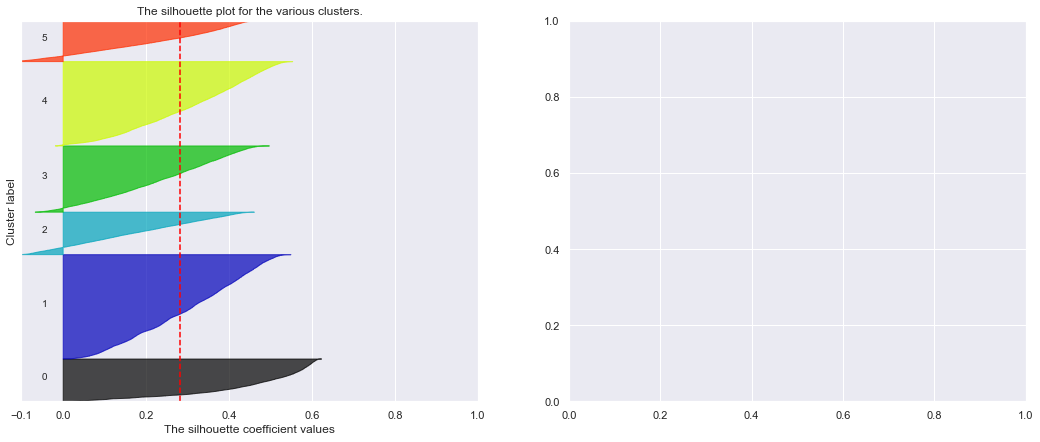

In [411]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
# X, y = make_blobs(
#     n_samples=500,
#     n_features=2,
#     centers=4,
#     cluster_std=1,
#     center_box=(-10.0, 10.0),
#     shuffle=True,
#     random_state=1,
# )  # For reproducibility

range_n_clusters = [6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

## DBSCAN clustering algorithm

Finds core samples of high density and expands clusters from them.


For n_clusters = 2 The average silhouette_score is : -0.7147261162608932


TypeError: '(slice(None, None, None), 0)' is an invalid key

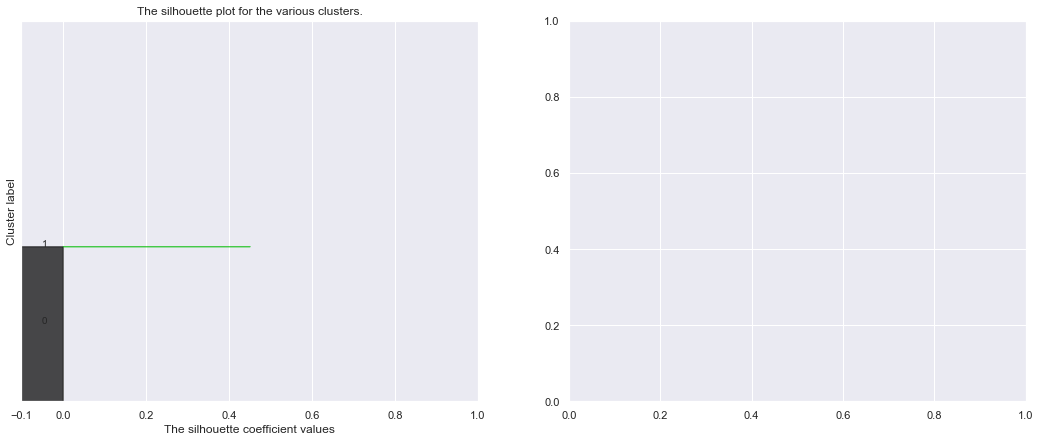

In [381]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
# X, y = make_blobs(
#     n_samples=500,
#     n_features=2,
#     centers=4,
#     cluster_std=1,
#     center_box=(-10.0, 10.0),
#     shuffle=True,
#     random_state=1,
# )  # For reproducibility

range_n_clusters = [2]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = DBSCAN(eps=3, min_samples=2)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [417]:
## Finding best values of eps and min_samples
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

# Defining the list of hyperparameters to try
eps_list=np.arange(start=0.1, stop=0.9, step=0.01)
min_sample_list=np.arange(start=2, stop=5, step=1)

# Creating empty data frame to store the silhouette scores for each trials
silhouette_scores_data=pd.DataFrame()

for eps_trial in eps_list:
    for min_sample_trial in min_sample_list:
        
        # Generating DBSAN clusters
        db = DBSCAN(eps=eps_trial, min_samples=min_sample_trial)
        
        sil_score=silhouette_score(X, db.fit_predict(X))
        
            
        trial_parameters="eps:" + str(eps_trial.round(1)) +" min_sample :" + str(min_sample_trial)
        
        silhouette_scores_data=silhouette_scores_data.append(pd.DataFrame(data=[[sil_score,trial_parameters]], columns=["score", "parameters"]))

# Finding out the best hyperparameters with highest Score
silhouette_scores_data.sort_values(by='score', ascending=False).head(1)

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [ ]:

# DBSCAN Clustering
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.18, min_samples=2)
# Plotting the clusters
plt.scatter(x= X[:,0], y= X[:,1], c=db.fit_predict(X))

NameError: name 'silscore' is not defined

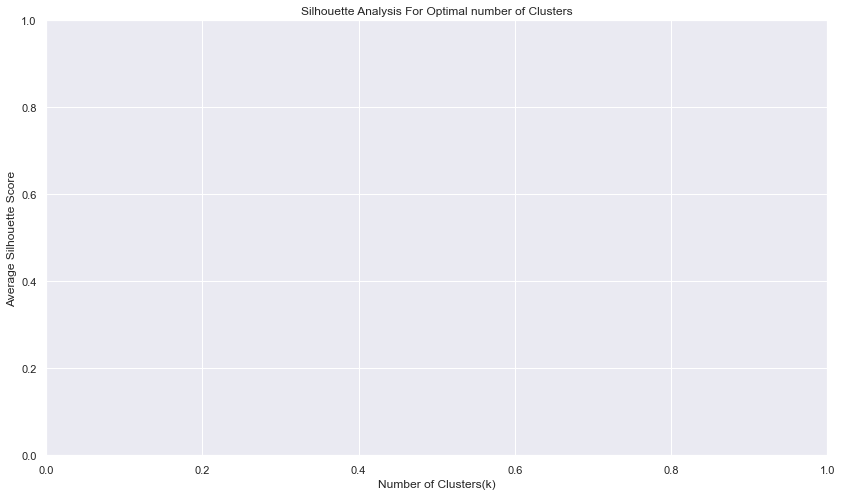

In [418]:
plt.figure(figsize=(14,8))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Analysis For Optimal number of Clusters')
sns.pointplot(x=range_n_clusters,y=silscore,color='royalblue')
plt.show()